In [1]:
'''Importing necesarry libraries'''
import plotly.offline as pyo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
'''load the agriculture dataset'''
agriculture=pd.read_csv('C:/Users/admin/Desktop/AgrcultureDataset.csv',sep='\s*,\s*',header=0,engine='python')

In [3]:
agriculture.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [4]:
agriculture.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88


In [5]:
agriculture.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

In [6]:
'''converting production to numeric type'''
agriculture['Production']=pd.to_numeric(agriculture['Production'],errors='coerce')

In [7]:
'''checking null values'''
agriculture.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3727
dtype: int64

In [8]:
'''Impute missing values with Median'''
agri=agriculture[["Area","Production"]]
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values=np.nan,strategy='median',axis=0)
imput=imputer.fit_transform(agri)
agri.head()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0


In [9]:
Agri=pd.DataFrame(imput)
Agri.columns=["Area","Production"]
Agri.index=agri.index
Agri.head()

,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0


In [10]:
agriculture["Area"]=Agri["Area"]
agriculture["Production"]=Agri["Production"]
agriculture.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [11]:
agriculture.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [12]:
'''statistical summary'''
agriculture.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.736855e+05
std,4.952164,5.052340e+04,1.693613e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,6.769000e+03
max,2015.000000,8.580100e+06,1.250800e+09


# Basic Visualisation

In [13]:
'''Plotly plot on Production variable'''
pyo.plot([{
    'x' : agriculture.index,
    'y' : agriculture.Production
}])

'temp-plot.html'

In [14]:
'''Area and Production'''
agriculture_sf=agriculture[["Area","Production"]]

In [15]:
pyo.plot([{
    'x' : agriculture_sf.index,
    'y' : agriculture_sf[col],
    'name': col
} for col in agriculture_sf.columns])

'temp-plot.html'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B140CCA048>,
      dtype=object)

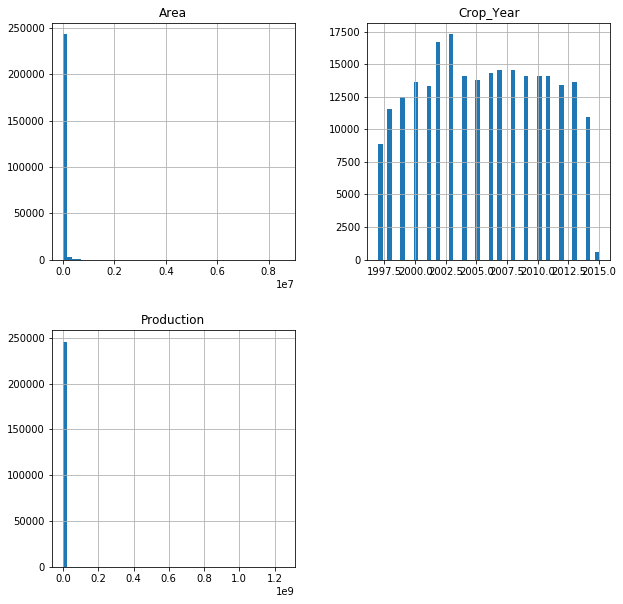

In [16]:
'''Histogram'''
agriculture.hist(figsize=(10,10),bins=50)

In [17]:
'''Production on Season wise'''
agriculture.groupby(by=['Season'])['Crop'].count()

Season
Autumn         4949
Kharif        95951
Rabi          66987
Summer        14841
Whole Year    57305
Winter         6058
Name: Crop, dtype: int64

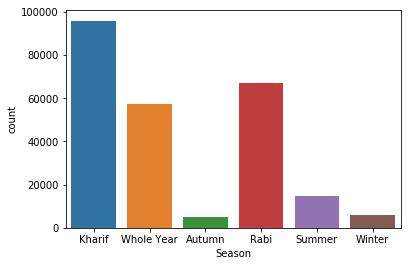

In [18]:
'''Production on seasons wise'''
sns.countplot(agriculture.Season)

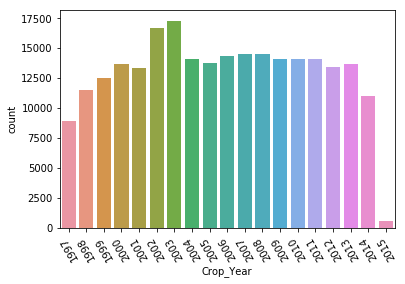

In [19]:
'''Production on year wise'''
agriculture.groupby(by=['Crop_Year'])['Crop'].count()
plt.xticks(rotation=3000000)
sns.countplot(agriculture.Crop_Year)

In [20]:
'''Total Crops Count in India'''
agriculture.groupby(by=['Crop'])['Crop'].count()

Crop
Apple                            4
Arcanut (Processed)             20
Arecanut                      1577
Arhar/Tur                     7578
Ash Gourd                       44
Atcanut (Raw)                   20
Bajra                         5427
Banana                        3209
Barley                        4199
Bean                            20
Beans & Mutter(Vegetable)      167
Beet Root                       16
Ber                             11
Bhindi                         236
Bitter Gourd                    92
Black pepper                   934
Blackgram                      118
Bottle Gourd                    84
Brinjal                        386
Cabbage                        205
Cardamom                       427
Carrot                          28
Cashewnut                     1081
Cashewnut Processed             21
Cashewnut Raw                   35
Castor seed                   3376
Cauliflower                    122
Citrus Fruit                   301
Coconut        

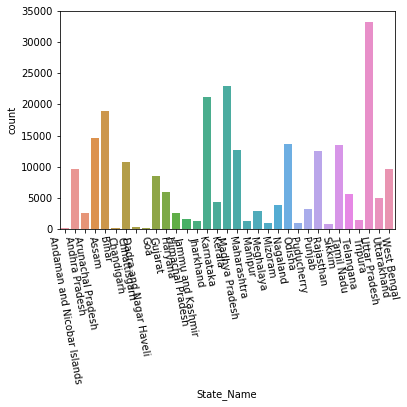

In [21]:
plt.xticks(rotation=10000000000000)
sns.countplot(agriculture.State_Name)

In [22]:
'''Subsetting the Kharif Season'''
kharif=agriculture[agriculture['Season']=='Kharif']
kharif.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.0
11,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Other Kharif pulses,2.0,1.0


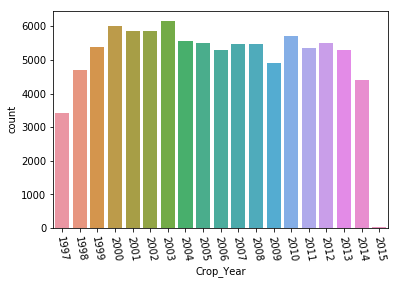

In [23]:
'''only kharif season yearwise'''
plt.xticks(rotation=10000000000000)
sns.countplot(kharif.Crop_Year)

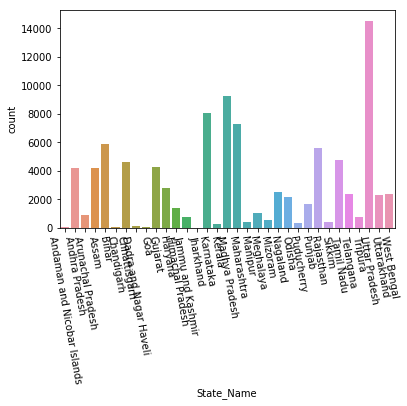

In [24]:
'''only kharif season statewise'''
plt.xticks(rotation=10000000000000)
sns.countplot(kharif.State_Name)

In [25]:
'''Subsetting the only Rice crop'''
rice=agriculture[agriculture['Crop']=='Rice']
rice.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57


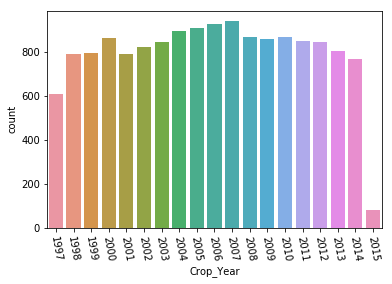

In [26]:
'''rice crop yearwise'''
plt.xticks(rotation=10000000000000)
sns.countplot(rice.Crop_Year)

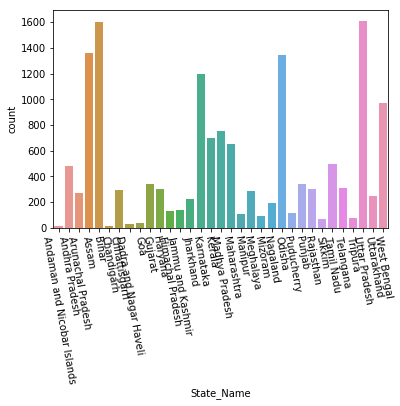

In [27]:
'''rice crop statewise'''
plt.xticks(rotation=10000000000000)
sns.countplot(rice.State_Name)

In [28]:
'''Subsetting only Andhra Pradesh State'''
Andhrapradesh=agriculture[agriculture['State_Name']=='Andhra Pradesh']
Andhrapradesh.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0
204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0
205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0
206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0


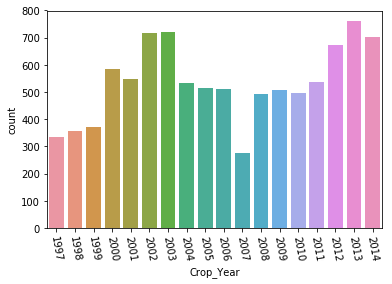

In [29]:
'''Andhrapradesh year wise crop production'''
plt.xticks(rotation=10000000000000)
sns.countplot(Andhrapradesh.Crop_Year)

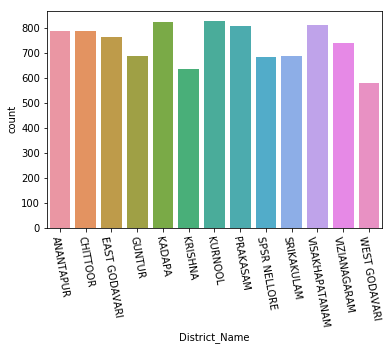

In [30]:
'''Andhrapradesh statewise crop propduction'''
plt.xticks(rotation=10000000000000)
sns.countplot(Andhrapradesh.District_Name)

In [31]:
'''Production In Andhra pradesh only Guntur District'''
guntur=agriculture[agriculture['District_Name']=='GUNTUR']
guntur.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2545,Andhra Pradesh,GUNTUR,1997,Kharif,Arhar/Tur,28400.0,14900.0
2546,Andhra Pradesh,GUNTUR,1997,Kharif,Bajra,100.0,100.0
2547,Andhra Pradesh,GUNTUR,1997,Kharif,Castor seed,1600.0,300.0
2548,Andhra Pradesh,GUNTUR,1997,Kharif,Cotton(lint),162300.0,432500.0
2549,Andhra Pradesh,GUNTUR,1997,Kharif,Dry chillies,27100.0,97300.0


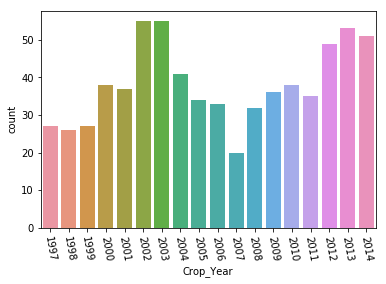

In [32]:
'''production in guntur yearwise'''
plt.xticks(rotation=10000000000000)
sns.countplot(guntur.Crop_Year)

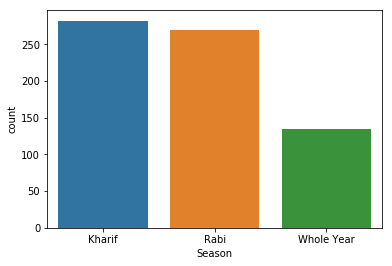

In [33]:
'''Guntur season wise'''
sns.countplot(guntur.Season)

In [34]:
'''Andhrapradesh guntur kharif crops'''
gunturkharif=guntur[guntur['Season']=='Kharif']
gunturkharif.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2545,Andhra Pradesh,GUNTUR,1997,Kharif,Arhar/Tur,28400.0,14900.0
2546,Andhra Pradesh,GUNTUR,1997,Kharif,Bajra,100.0,100.0
2547,Andhra Pradesh,GUNTUR,1997,Kharif,Castor seed,1600.0,300.0
2548,Andhra Pradesh,GUNTUR,1997,Kharif,Cotton(lint),162300.0,432500.0
2549,Andhra Pradesh,GUNTUR,1997,Kharif,Dry chillies,27100.0,97300.0


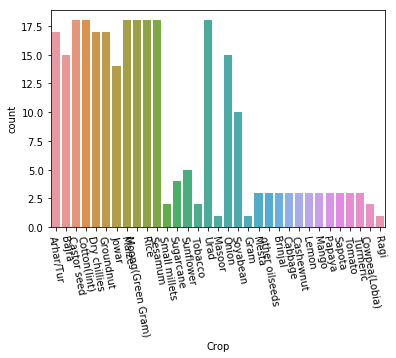

In [35]:
'''Guntur distict kharif season'''
plt.xticks(rotation=100000000000)
sns.countplot(gunturkharif.Crop)

In [36]:
'''GUntur district chilli crop'''
chilli=gunturkharif[gunturkharif['Crop']=='Dry chillies']

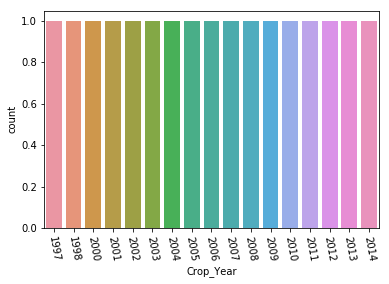

In [37]:
'''chilli crop year wise'''
plt.xticks(rotation=100000000000)
sns.countplot(chilli.Crop_Year)

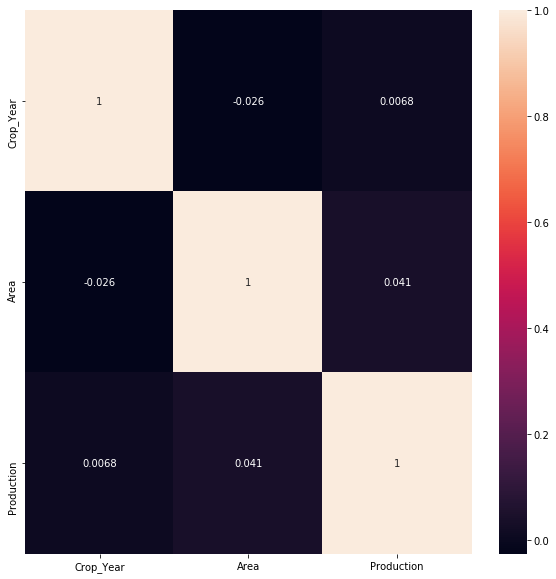

In [38]:
'''Correlation'''
plt.subplots(figsize=(10, 10))
sns.heatmap(agriculture.corr(), annot=True)

# Data Preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x=agriculture.drop(columns=['Season','Crop_Year','State_Name','District_Name','Crop'])
y=agriculture['Season']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [43]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Fitting

# Support vector Machine

In [56]:
from sklearn.svm import SVC

In [57]:
svcclassifier=SVC(kernel='linear')
svcclassifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
y_pred=svcclassifier.predict(x_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [61]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred)) 

[[    0  1463     0     0     0     0]
 [    0 28772     0     0    79     0]
 [    0 20117     0     0     3     0]
 [    0  4436     0     0     0     0]
 [    0 16752     0     0   373     0]
 [    0  1833     0     0     0     0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

      Autumn       0.00      0.00      0.00      1463
      Kharif       0.39      1.00      0.56     28851
        Rabi       0.00      0.00      0.00     20120
      Summer       0.00      0.00      0.00      4436
  Whole Year       0.82      0.02      0.04     17125
      Winter       0.00      0.00      0.00      1833

   micro avg       0.39      0.39      0.39     73828
   macro avg       0.20      0.17      0.10     73828
weighted avg       0.34      0.39      0.23     73828



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [62]:
accuracy_score(y_test,y_pred)

0.3947689223600802

In [63]:
from sklearn import tree

In [64]:
decisiontree=tree.DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
y_pre=decisiontree.predict(x_test)

In [66]:
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre)) 

[[   57   779   399    48   112    68]
 [  676 15957  7386   814  2631  1387]
 [  437 10569  5645   658  1861   950]
 [  138  2460  1125   200   339   174]
 [  467  8171  3767   632  3417   671]
 [   37   978   460    42   171   145]]
              precision    recall  f1-score   support

      Autumn       0.03      0.04      0.03      1463
      Kharif       0.41      0.55      0.47     28851
        Rabi       0.30      0.28      0.29     20120
      Summer       0.08      0.05      0.06      4436
  Whole Year       0.40      0.20      0.27     17125
      Winter       0.04      0.08      0.06      1833

   micro avg       0.34      0.34      0.34     73828
   macro avg       0.21      0.20      0.20     73828
weighted avg       0.34      0.34      0.33     73828



# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [68]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
y_predi=logistic.predict(x_test)

In [70]:
print(confusion_matrix(y_test,y_predi))
print(classification_report(y_test,y_predi)) 

[[    0  1463     0     0     0     0]
 [    0 28759     0     0    92     0]
 [    0 20115     0     0     0     5]
 [    0  4436     0     0     0     0]
 [    0 16657     0     0   465     3]
 [    0  1833     0     0     0     0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

      Autumn       0.00      0.00      0.00      1463
      Kharif       0.39      1.00      0.56     28851
        Rabi       0.00      0.00      0.00     20120
      Summer       0.00      0.00      0.00      4436
  Whole Year       0.83      0.03      0.05     17125
      Winter       0.00      0.00      0.00      1833

   micro avg       0.40      0.40      0.40     73828
   macro avg       0.20      0.17      0.10     73828
weighted avg       0.35      0.40      0.23     73828



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [71]:
accuracy_score(y_test,y_predi)

0.39583897708186594

# K Nearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [74]:
pred_knn = knn.predict(x_test)

In [75]:
print(confusion_matrix(y_test,y_predi))
print(classification_report(y_test,y_predi)) 
accuracy_score(y_test,pred_knn)

[[    0  1463     0     0     0     0]
 [    0 28759     0     0    92     0]
 [    0 20115     0     0     0     5]
 [    0  4436     0     0     0     0]
 [    0 16657     0     0   465     3]
 [    0  1833     0     0     0     0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

      Autumn       0.00      0.00      0.00      1463
      Kharif       0.39      1.00      0.56     28851
        Rabi       0.00      0.00      0.00     20120
      Summer       0.00      0.00      0.00      4436
  Whole Year       0.83      0.03      0.05     17125
      Winter       0.00      0.00      0.00      1833

   micro avg       0.40      0.40      0.40     73828
   macro avg       0.20      0.17      0.10     73828
weighted avg       0.35      0.40      0.23     73828



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



0.3850029798992252

# Artificial Nural Networks

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
ann = MLPClassifier()
ann.fit(x_train,y_train)
ann_pred = ann.predict(x_test)
accuracy_score(y_test,ann_pred)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.4169691715880154

# Naive bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
pred_NB=NB.predict(x_test)

In [53]:
accuracy_score(y_test,pred_NB)

0.0945034404291055

# Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bagging=BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [52]:
pred_bagg=bagging.predict(x_test)

In [54]:
accuracy_score(y_test,pred_bagg)

0.3773229668960286

# Random Forest

In [55]:
#random
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc=RandomForestClassifier(n_estimators=30)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc.pred=rfc.predict(x_test)

In [61]:
accuracy_score(y_test,rfc.pred)

0.38948637373354283

# OPtimisation

# AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
AdaBoost=AdaBoostClassifier()

In [77]:
AdaBoost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [83]:
pred_AdaBoost=AdaBoost.predict(x_test)

In [84]:
accuracy_score(y_test,pred_AdaBoost)

0.41344747250365715

In [87]:
params_Adb_RS=AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [88]:
params_Adb_RS.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=50, random_state=None)

In [89]:
Adb_pred=params_Adb_RS.predict(x_test)

In [90]:
accuracy_score(y_test,Adb_pred)

0.41344747250365715

# Gradient Decent

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
GBC=GradientBoostingClassifier()

In [93]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [94]:
GBC_pred=GBC.predict(x_test)

In [95]:
accuracy_score(y_test,GBC_pred)

0.4251097144714742

# XGboost

In [96]:
from xgboost import XGBClassifier

In [97]:
XGB=XGBClassifier()

In [98]:
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [99]:
XGB_pred=XGB.predict(x_test)

In [100]:
accuracy_score(y_test,XGB_pred)

0.42498780950316956